In [4]:
#Load and import data
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict, KFold
df = pd.read_csv('Trees_Quantified.csv')

In [10]:
unique_species = df['spc_common'].unique() 
species_columns = [col for col in df.columns if col in unique_species]
selected_columns = ["tree_dbh","stump_diam", "curb_loc", "census tract", "cncldist", "st_assem",
      "brch_other", "brch_shoe", "brch_light", "trnk_light", "trunk_wire", "root_other",
      "root_grate", "root_stone", "sidewalk", "guards", "steward"] +species_columns
x = df[selected_columns]
y = df["health"]
#x = x.apply(pd.to_numeric, errors='coerce')
#print(x.isnull().sum())
#x.to_csv('output.csv', index=False)
xH=x.copy()

Accuracy: 0.393440530226455
MSE: 0.05838522764607405


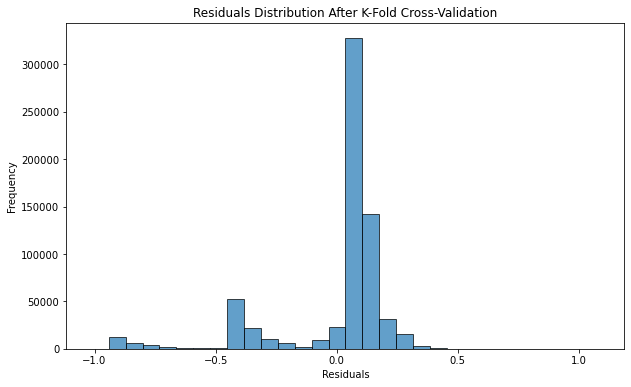

In [22]:
#-----------------------------FINAL HEALTH MODEL ----------------------------------------------
#USE THIS
scaler = PowerTransformer()
x_scaled= scaler.fit_transform(xH)
mlp_H= MLPRegressor(hidden_layer_sizes=(10, 5), activation='relu',solver='adam', alpha=1, max_iter=300, early_stopping=True, random_state=42)
#mlp_H.fit(x_trainH, y_trainH)
cv = KFold(n_splits=5, shuffle=True, random_state=42)
y_pred = cross_val_predict(mlp_H, x_scaled, y, cv=cv)
residuals = y - y_pred
accuracy = r2_score(y, y_pred)
mse = mean_squared_error(y, y_pred)
#print the accuracy
print("Accuracy:", accuracy)
print("MSE:", mse)
plt.figure(figsize=(10, 6))
plt.hist(residuals, bins=30, edgecolor='k', alpha=0.7)
plt.title('Residuals Distribution After K-Fold Cross-Validation')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

In [12]:
# Function to modify the census tract based on its length
df['census tract'] = df['census tract'].astype(str).str.replace('.00', '', regex=True)
def striging(census):
    modified_tracts = []
    for part in census:
        part1 = str(part)
        part_no = part1
        if part1[len(part1)-2]=='.':
            part_no = part_no[:len(part1)-2]
        modified_tracts.append(part_no)
    return modified_tracts

df['census tract'] = striging(df['census tract'])
print(df['census tract'])

0            739
1            973
2            449
3            449
4            165
           ...  
674110       519
674111       707
674112       201
674113    235.02
674114      1341
Name: census tract, Length: 674115, dtype: object


In [20]:
df['rf_predicted_health'] = y_pred

In [21]:
df.to_csv('DecisionTree_Neural_Health_Predictions.csv', index=False)

In [ ]:
#ALL CODE BELOW IS EXTRA FOR PARAMETER TUNNING AND OPTIMIZATION. NOT NCESSARY TO RUN
#THEY also used other version of data cleaning, please do not use

Accuracy: 0.4122636867732239
MSE: 0.05635862383738353


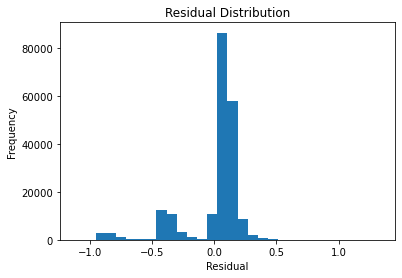

Accuracy: 0.4122636867732239
MSE: 0.05635862383738353


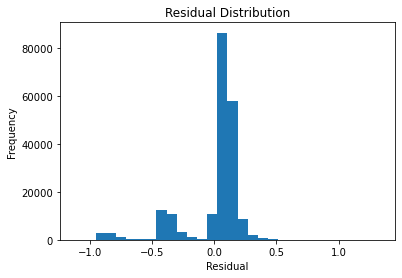

Accuracy: 0.4122636867732239
MSE: 0.05635862383738353


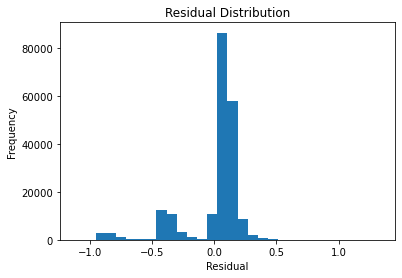

In [18]:
#Using NN as a regressor for probability rather than for classification
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
#Scale the data to get good performance
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
#Try two hidden layers first
mlp = MLPRegressor(hidden_layer_sizes=(100, 50), activation='relu',solver='adam', max_iter=300,random_state=42)
mlp.fit(x_train, y_train)
y_predict = mlp.predict(x_test)
accuracy = r2_score(y_test, y_predict)
mse = mean_squared_error(y_test, y_predict)
#print the accuracy
print("Accuracy:", accuracy)
print("MSE:", mse)
residuals = y_test - y_predict
plt.hist(residuals, bins=30)
plt.title("Residual Distribution")
plt.xlabel("Residual")
plt.ylabel("Frequency")
plt.show()
#Graph looks to be overfitted. Need to use L2 regularization an decraese the size of layers
mlp2 = MLPRegressor(hidden_layer_sizes=(100, 50), activation='relu',solver='adam', alpha=0.0001, max_iter=300,random_state=42)
mlp2.fit(x_train, y_train)
y_predict2 = mlp.predict(x_test)
accuracy2 = r2_score(y_test, y_predict2)
mse2 = mean_squared_error(y_test, y_predict2)
#print the accuracy
print("Accuracy:", accuracy2)
print("MSE:", mse2)
residuals = y_test - y_predict2
plt.hist(residuals, bins=30)
plt.title("Residual Distribution")
plt.xlabel("Residual")
plt.ylabel("Frequency")
plt.show()
#Increasing the regularization
mlp3 = MLPRegressor(hidden_layer_sizes=(100, 50), activation='relu',solver='adam', alpha=0.001,max_iter=300,random_state=42)
mlp3.fit(x_train, y_train)
y_predict3 = mlp.predict(x_test)
accuracy3 = r2_score(y_test, y_predict3)
mse3 = mean_squared_error(y_test, y_predict3)
#print the accuracy
print("Accuracy:", accuracy3)
print("MSE:", mse3)
residuals = y_test - y_predict3
plt.hist(residuals, bins=30)
plt.title("Residual Distribution")
plt.xlabel("Residual")
plt.ylabel("Frequency")
plt.show()
#Conclusion: Linearization does not work ):


Accuracy: 0.8224977118815668
MSE: 0.03588631439595467


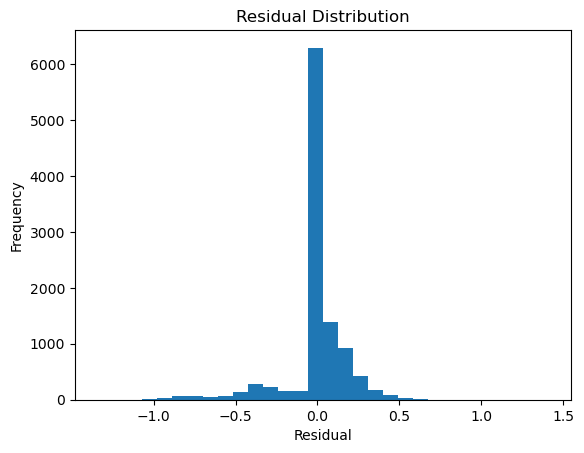

In [253]:
x_trainH, x_testH, y_trainH, y_testH = train_test_split(xH, y, test_size=0.2, random_state=42)
mlp_H= MLPRegressor(hidden_layer_sizes=(30, 30), activation='relu',solver='adam', alpha=10, max_iter=300, random_state=42)
scaler = PowerTransformer()
x_trainH = scaler.fit_transform(x_trainH)
x_testH = scaler.transform(x_testH)
mlp_H.fit(x_trainH, y_trainH)
y_predictH = mlp.predict(x_testH)
accuracy = r2_score(y_testH, y_predictH)
mse = mean_squared_error(y_testH, y_predictH)
#print the accuracy
print("Accuracy:", accuracy)
print("MSE:", mse)
residuals = y_testH - y_predictH
plt.hist(residuals, bins=30)
plt.title("Residual Distribution")
plt.xlabel("Residual")
plt.ylabel("Frequency")
plt.show()

Accuracy: 0.8315385093579176
MSE: 0.03397883338872761


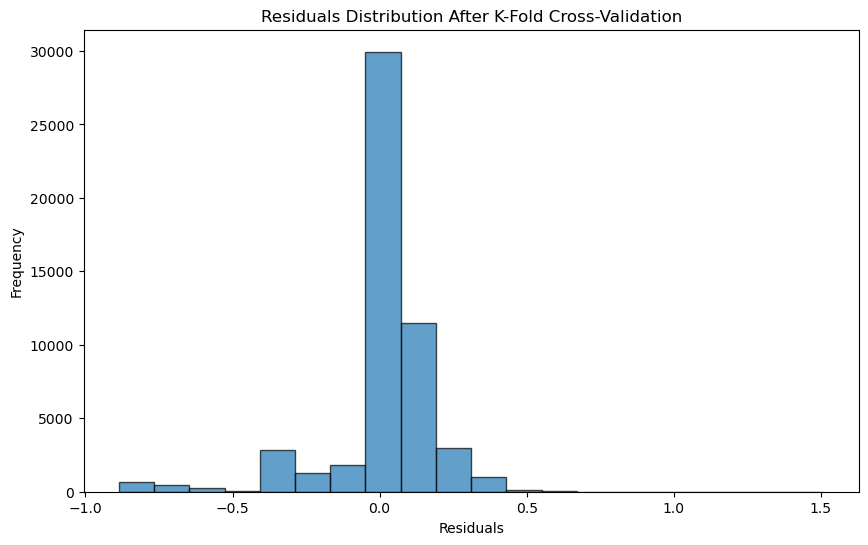

In [283]:
#-----------------------------FINAL HEALTH MODEL ----------------------------------------------
#USE THIS
scaler = PowerTransformer()
x_scaled= scaler.fit_transform(xH)
mlp_H= MLPRegressor(hidden_layer_sizes=(2, 2), activation='relu',solver='adam', alpha=1, max_iter=300, early_stopping=True, random_state=42)
#mlp_H.fit(x_trainH, y_trainH)
cv = KFold(n_splits=5, shuffle=True, random_state=42)
y_pred = cross_val_predict(mlp_H, x_scaled, y, cv=cv)
residuals = y - y_pred
accuracy = r2_score(y, y_pred)
mse = mean_squared_error(y, y_pred)
#print the accuracy
print("Accuracy:", accuracy)
print("MSE:", mse)
plt.figure(figsize=(10, 6))
plt.hist(residuals, bins=30, edgecolor='k', alpha=0.7)
plt.title('Residuals Distribution After K-Fold Cross-Validation')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

In [279]:
x_sample = x_scaled[:100]  # Use a small subset to reduce computation time
# Initialize KernelExplainer
explainer = shap.DeepExplainer(mlp_H, x_sample)
#explainer = shap.KernelExplainer(mlp_H.predict, x_sample)
# Compute SHAP values for test data
shap_values = explainer.shap_values(x_scaled[:50])  # Limit to 50 samples for efficiency
# Plot the SHAP summary plot
shap.summary_plot(shap_values, x_scaled[:50], feature_names=xH.columns)

C:\Users\thoma\anaconda3\Lib\site-packages\shap\explainers\_deep\deep_tf.py:99: UserWarning: Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.
  warnings.warn("Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.")


ValueError: <class 'sklearn.neural_network._multilayer_perceptron.MLPRegressor'> is not currently a supported model type!

Number of features in training data: 17
Accuracy: 0.2483052070008065
MSE: 0.15236811048563426


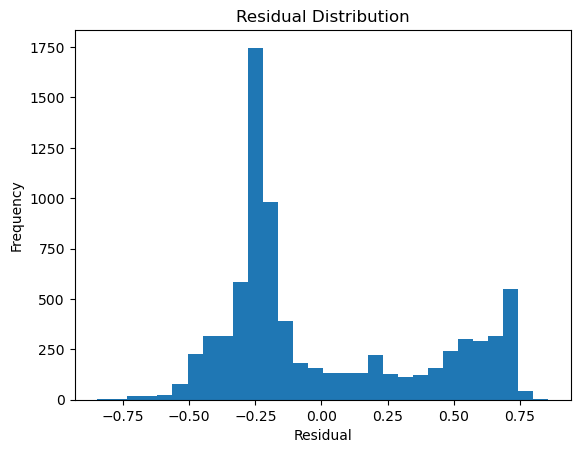

  0%|          | 0/50 [00:00<?, ?it/s]

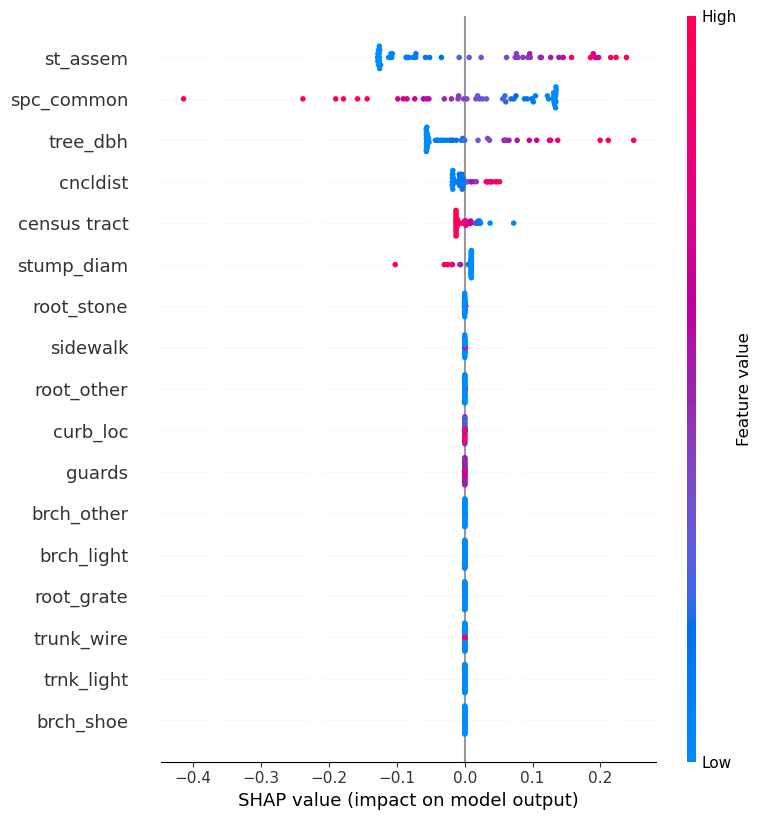

In [207]:
#Try not making every species a different feature
#Can use built-in labelEnconder function
label_encoder = LabelEncoder()
xOriginal['spc_common'] = label_encoder.fit_transform(xOriginal['spc_common'])
xOriginal = xOriginal.drop(columns=["steward"])
# Check the mapping of species to numbers
#species_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
#print("Species Mapping:", species_mapping)
x_trainO, x_testO, y_trainO, y_testO = train_test_split(xOriginal, y, test_size=0.15, random_state=42)
#Scale the data to get good performance
scaler = Normalizer()
x_trainO = scaler.fit_transform(x_trainO)
x_testO = scaler.transform(x_testO)
print("Number of features in training data:", x_trainO.shape[1])
#Now, run the NN:
mlp_original = MLPRegressor(hidden_layer_sizes=(5, 5), activation='relu',solver='adam', alpha=1, max_iter=300, early_stopping=True, random_state=42)
mlp_original.fit(x_trainO, y_trainO)
y_predictO = mlp_original.predict(x_testO)
accuracyO = r2_score(y_testO, y_predictO)
mseO = mean_squared_error(y_testO, y_predictO)
#print the accuracy
print("Accuracy:", accuracyO)
print("MSE:", mseO)
residuals = y_testO - y_predictO
plt.hist(residuals, bins=30)
plt.title("Residual Distribution")
plt.xlabel("Residual")
plt.ylabel("Frequency")
plt.show()
#Deep Dive into weight of each feature ----------------------
# Initialize SHAP explainer for the model
#explainer = shap.Explainer(mlp_original, x_trainO)
# Compute SHAP values
#shap_values = explainer(x_testO)
# Plot feature importance
#shap.summary_plot(shap_values, x_testO, feature_names=feature_names)

x_sample = x_trainO[:100]  # Use a small subset to reduce computation time
# Initialize KernelExplainer
explainer = shap.KernelExplainer(mlp_original.predict, x_sample)
# Compute SHAP values for test data
shap_values = explainer.shap_values(x_testO[:50])  # Limit to 50 samples for efficiency
# Plot the SHAP summary plot
shap.summary_plot(shap_values, x_testO[:50], feature_names=xOriginal.columns)

In [107]:
# Initialize SHAP KernelExplainer
x_sample = x_trainO[:100]  # Subset for efficiency
explainer = shap.KernelExplainer(mlp_original.predict, x_sample)
# Compute SHAP values for the first test instance
shap_values = explainer.shap_values(x_testO[:1])
# Load JS for SHAP visualizations
shap.initjs()
# Generate a force plot for the first test instance
shap.force_plot(
    explainer.expected_value,  # Baseline value
    shap_values[0],            # SHAP values for the instance
    x_testO[0],                # Feature values for the instance
    feature_names=xOriginal.columns
)

  0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
#Now, will modify the loss function to see if the residual distribution improves
#Substitute MSE with Huber loss
#Try not making every species a different feature
#Can use built-in labelEnconder function
label_encoder = LabelEncoder()
xH['spc_common'] = label_encoder.fit_transform(xH['spc_common'])
xH = xH.drop(columns=["steward"])
# Check the mapping of species to numbers
#species_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
#print("Species Mapping:", species_mapping)
x_trainH, x_testH, y_trainH, y_testH = train_test_split(xH, y, test_size=0.15, random_state=42)
#Scale the data to get good performance
scaler = StandardScaler()
x_trainH = scaler.fit_transform(x_trainH)
x_testH = scaler.transform(x_testH)
print("Number of features in training data:", x_trainH.shape[1])
#Now, run the NN:
mlp_H = MLPRegressor(hidden_layer_sizes=(5, 5), activation='relu',solver='adam', alpha=0.1, max_iter=300, early_stopping=True, random_state=42)
mlp_H.fit(x_trainH, y_trainH)
y_predictH = mlp_original.predict(x_testH)
accuracyH = r2_score(y_testH, y_predictH)
mseH = mean_squared_error(y_testH, y_predictH)
#print the accuracy
print("Accuracy:", accuracyH)
print("MSE:", mseH)
residuals = y_testH - y_predictH
plt.hist(residuals, bins=30)
plt.title("Residual Distribution")
plt.xlabel("Residual")
plt.ylabel("Frequency")
plt.show()
#Deep Dive into weight of each feature ----------------------
# Initialize SHAP explainer for the model
#explainer = shap.Explainer(mlp_original, x_trainO)
# Compute SHAP values
#shap_values = explainer(x_testO)
# Plot feature importance
#shap.summary_plot(shap_values, x_testO, feature_names=feature_names)

x_sampleH = x_trainH[:100]  # Use a small subset to reduce computation time
# Initialize KernelExplainer
explainer = shap.KernelExplainer(mlp_H.predict, x_sampleH)
# Compute SHAP values for test data
shap_values = explainer.shap_values(x_testO[:50])  # Limit to 50 samples for efficiency
# Plot the SHAP summary plot
shap.summary_plot(shap_values, x_testH[:50], feature_names=xH.columns)